
 # Generating temporal networks

 ## Generating a network array from teneto.generatenetwork

 Instead of manually specifying networks, teneto provides tools to generate networks. Currently there are two methods of generating networks: using binomial or poisson distributions. Both of theseetworks are binary. In this tutorial we focus on the binomial distribution.

 In the teneto.generatenetwork.rand_binomial each connection is determined based on a binomialdistribution. It takes two necessary inputs: size of network and probability of connection. Additional inputs such as whether the output format and if the network should be directed or undirected. Each edge is determined independently of all others (i.e. if p=0.5 each each has a 50% chance of being possible).


In [1]:

import teneto
import numpy as np
np.random.seed(2017) # For reproducibility
# Number of nodes
N = 3
# Number of timepoints
T = 5
# Probability of edge activation
p = 0.5
C1 = teneto.generatenetwork.rand_binomial([N,N,T],p,'contact','bu')



 It is also possible to add meta information for contact representation which then carries through to plotting functions. This is done by giving a dictionary to the _netinfo_ argument.


In [2]:
np.random.seed(2017) # For reproducibility
# Number of nodes
N = 3
# Number of timepoints
T = 5
# Probability of edge activation
p = 0.5
# Specify network information
cfg={}
cfg['timeunit']='Seconds'
cfg['Fs']=0.2
#Generate network
C2 = teneto.generatenetwork.rand_binomial([N,N,T],p,'contact','bu',netinfo=cfg)



 Let's visualize the networks that we have just visualized.


In [3]:
# Create matplotlib figure
fig,ax = plt.subplots(figsize=(10,3))
ax = plt.subplot(1,1,1)
ax = teneto.plot.graphlet_stack_plot(C2,ax,q=10,cmap='Reds')


NameError: name 'plt' is not defined


 To make the networks a little more complex, the probabilities for active and inactive edges can be different. Instead of passing a single integer to :math:`p`, you can pass a list of 2 values. The first value is the probability at t-1=0 an edge be active at :math:`t` (sometimes called the birth-rate). The second value is the probability of edges who, at :math:`t - 1 = 1` will be active at :math:`t` (sometimes called the death-rate). The latter value helps create an autocorrelation.


In [4]:

np.random.seed(2017) # For reproducibility
# Number of nodes
N = 5
# Number of timepoints
T = 10
# Probability of edge activation
p0to1 = .25
p1to1 = 0.75
# Specify network information
cfg={}
cfg['timeunit']='Seconds'
cfg['Fs']=0.5
#Generate network
C3 = teneto.generatenetwork.rand_binomial([N,N,T],[p0to1,p1to1],'contact','bu',netinfo=cfg,)



 Displaying the network


/home/william/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


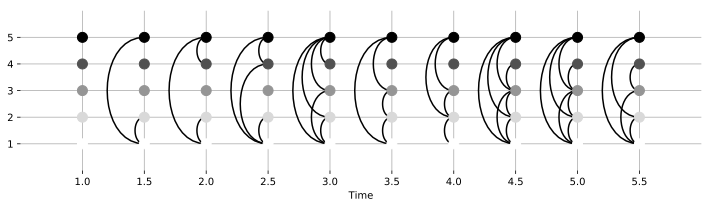

In [5]:
import matplotlib.pyplot as plt
# Create matplotlib figure
fig,ax = plt.subplots(figsize=(10,3))
ax = teneto.plot.slice_plot(C3,ax,cmap='Greys')
fig.tight_layout()
fig.show()



 This flexibility allows for the creation of different types of networks. For example, let us say that, once connected, a connection cannot be lost.
 Then p1to1=1 and edges can only increase.
 As can be seen in the plot above, at the first time-point, all edges are 0. This may not be what we want. An alternative is to change the argument _initialize_ which is the percentage of nodes that should be active at the first time-point. This is set in the example below.


In [6]:
np.random.seed(2017) # For reproduceability
# Number of nodes
N = 10
# Number of timepoints
T = 20
# Probability of edge activation
p0to1 = .1
p1to1 = 1
# Percentage of nodes active at time index 0.
initialize = 0.1
# Specify network information
cfg={}
cfg['timeunit']='Days'
cfg['Fs']=1
#Generate network
C4 = teneto.generatenetwork.rand_binomial([N,N,T],[p0to1,p1to1],'contact','bu',netinfo=cfg,initialize=initialize)



 Displaying the network


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


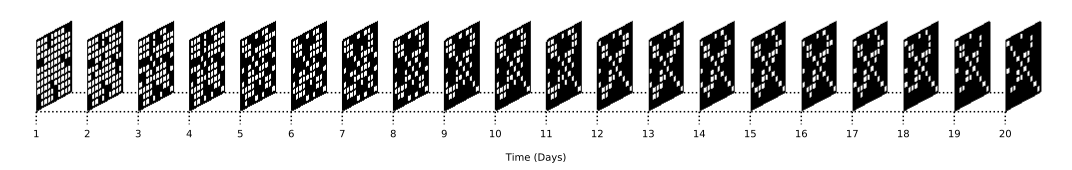

In [7]:
# Create matplotlib figure
fig,ax = plt.subplots(figsize=(15,4))
ax = teneto.plot.graphlet_stack_plot(C4,ax,q=10,cmap='Greys')
fig.tight_layout()


In [8]:
If we instead set p0to1=1 we will make sure that a node never has two consecutive activations.
#

SyntaxError: invalid syntax (<ipython-input-8-4c5a11cafaf5>, line 1)